# ML from Stacked NDWI, NDVI, and IBI

In [1]:
library(RStoolbox)
library(sp)
library(tidyverse)
library(e1071)
library(randomForest)
library(rasterVis)
library(rgdal)
library(geojsonio)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Loading required package: raster


Attaching package: 'raster'


The following object is masked from 'package:e1071':

    interpolate


The following object is masked from 'package:dplyr':

    select


The following object is masked from 'package:tidyr':

    extract


Loading required package: lattice

Loading required package: latticeExtra


Attaching package

In [2]:
setwd("C:/Users/s1526/Dropbox/EAGLE_Assessments/MB3_Geoinfo/MB3_FINAL/Data")

## Read in raster and vector data

In [3]:
list.files()

[1] "Chris_Samples"         "Collection_Antonio"    "Collection_Diego"     
 [4] "Collection_kevin"      "Luis_FieldSurvey"      "Merge_df.csv"         
 [7] "Merge_df.dbf"          "Merge_df.shp"          "Merge_df.shx"         
[10] "Nils_Point_images"     "Samples_Jakob"         "Samples_KM"           
[13] "Samples_Maurius"       "Samples_Sofia"         "stack_ROI_indices.tif"
[16] "stack_Wue_indices.tif" "Training"              "Wü_RGB.tif"

In [5]:
ROI_wue_indices <- raster(list.files()[15])
All_wue_indices <- raster(list.files()[16])
All_wue_RGB <- raster(list.files()[18])
Sample_buffer <- readOGR("C:/Users/s1526/Dropbox/EAGLE_Assessments/MB3_Geoinfo/MB3_FINAL/Data/Training")

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\s1526\Dropbox\EAGLE_Assessments\MB3_Geoinfo\MB3_FINAL\Data\Training", layer: "Sample_Buffer"
with 202 features
It has 7 fields


In [6]:
ROI_wue_indices

class      : RasterLayer 
band       : 1  (of  3  bands)
dimensions : 732, 1326, 970632  (nrow, ncol, ncell)
resolution : 10, 10  (x, y)
extent     : 563520, 576780, 5510400, 5517720  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=32 +datum=WGS84 +units=m +no_defs 
source     : C:/Users/s1526/Dropbox/EAGLE_Assessments/MB3_Geoinfo/MB3_FINAL/Data/stack_ROI_indices.tif 
names      : stack_ROI_indices 
values     : 0.284402, 0.9865591  (min, max)


In [7]:
td <- Sample_buffer

In [8]:
td

Warning message in proj4string(x):
"CRS object has comment, which is lost in output"


class       : SpatialPolygonsDataFrame 
features    : 202 
extent      : 568695, 571005, 5512574, 5515905  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=32 +datum=WGS84 +units=m +no_defs 
variables   : 7
names       : ID,    Latitude,   Longitude, Class_ID,       Class,                x,                y 
min values  :  1, 49.76178758, 9.954501575,        1, Agriculture, 568724.999983008, 5512603.78641672 
max values  : 99, 49.79128601, 9.985751838,        6,       Water, 570974.999973461, 5515875.00039804 

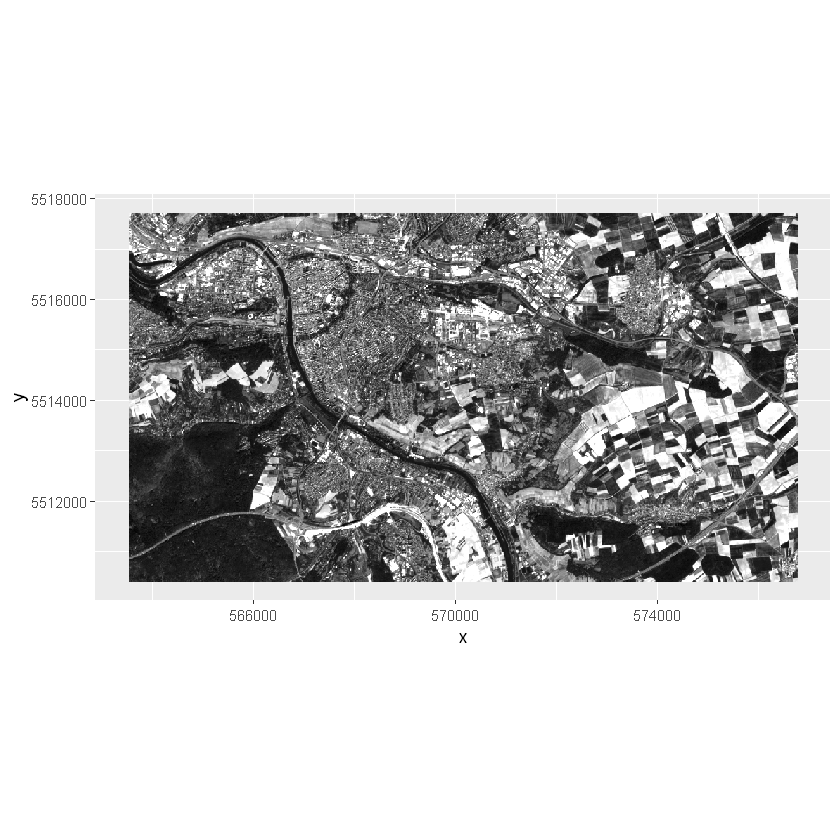

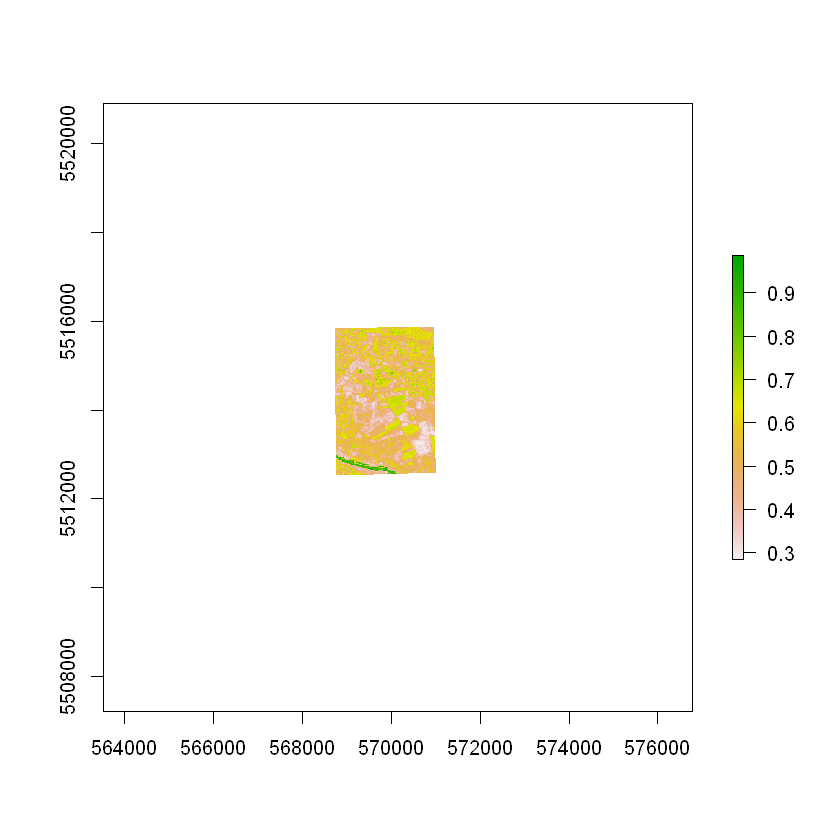

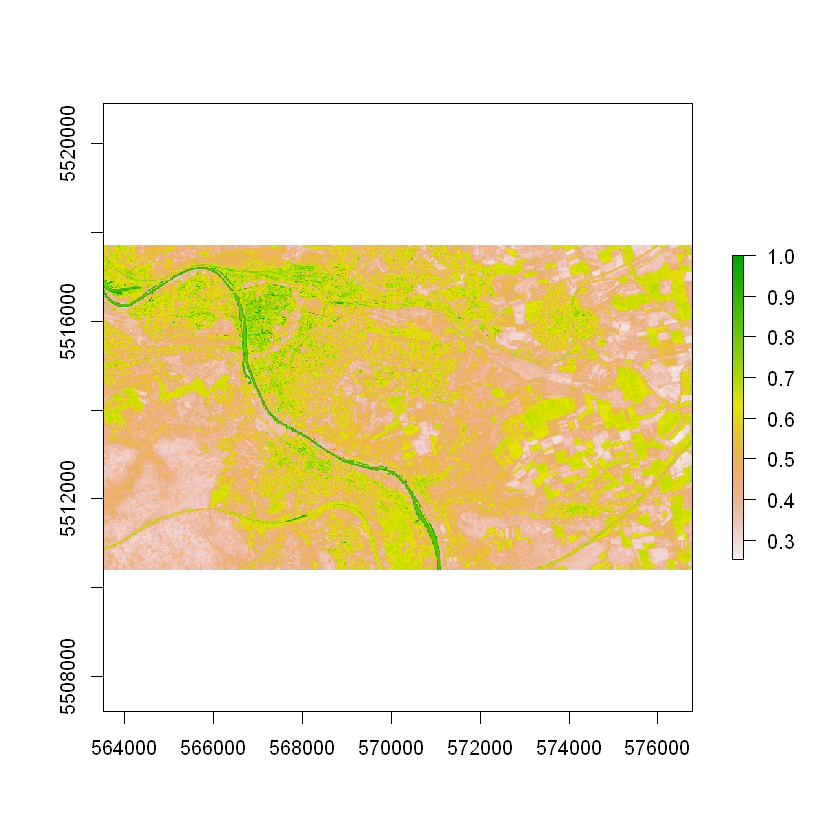

In [9]:
ggR(All_wue_RGB)
plot(ROI_wue_indices)
plot(All_wue_indices)

## RandomForest

In [10]:
sc <- superClass(ROI_wue_indices, trainData=td,
               responseCol = "Class_ID",
               model = "rf", 
               tuneLength = "random",
               trainPartition = 0.75,
               filename="C:/Users/s1526/Dropbox/EAGLE_Assessments/MB3_Geoinfo/MB3_FINAL/Class_test.tif"  
               )


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"invalid mtry: reset to within valid range"


In [18]:
setwd("C:/Users/s1526/Dropbox/EAGLE_Assessments/MB3_Geoinfo/MB3_FINAL")

summary(sc)

sc$validation$performance

save(sc, file = "RF_model.rda")

             Length Class       Mode
model            23 train       list
modelFit          2 -none-      list
training          1 -none-      list
validation        3 -none-      list
map          970632 RasterLayer S4  
classMapping      2 data.frame  list

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6
         1 211  28  71  53  77   4
         2  55  31  35  12  25   2
         3 117  30  60  45  37   3
         4 119  18  42  47  41   2
         5  98  26  50  21  42   2
         6   1  11   0   0   0  12

Overall Statistics
                                         
               Accuracy : 0.2822         
                 95% CI : (0.259, 0.3063)
    No Information Rate : 0.4209         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0691         
                                         
 Mcnemar's Test P-Value : 1.289e-09      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.3511  0.21528  0.23256  0.26404  0.18919 0.480000
Specificity            0.7183  0.89953  0.80171  0.82240  0.83665 0.991447
Pos Pred Value         0.4752  0.19375  0.20548  0.17472

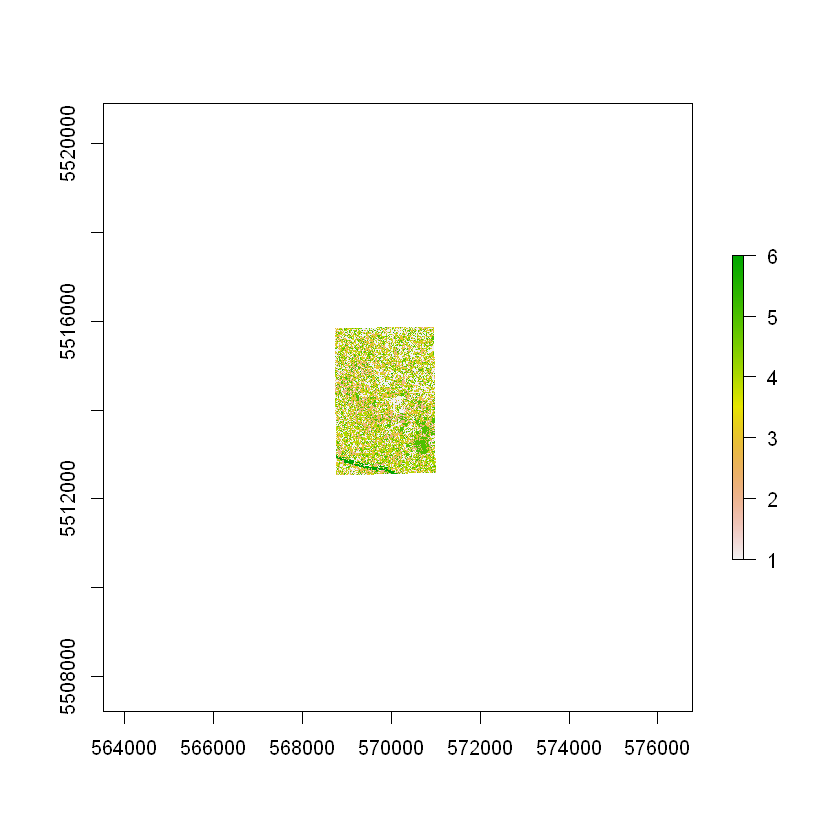

In [13]:
plot(sc$map)